## Завдання:

Кластеризація 

Агломеративний алгоритм AgglomerativeClustering. 

Дослiдити методи розрахунку вiдстанi мiж кластерами: ward, single, average, complete.

Метрики якостi: Estimated number of clusters, Adjusted Rand Index, V-measure. Побудувати матрицi вiдстаней мiж кластерами, використовуючи metrics.pairwise_distances.

Чи є розбиття стабiльним пiсля вилучення окремих об’єктiв?

&nbsp;

Початковi данi:

(a) sklearn.datasets.make_moons 

(б) sklearn.datasets.load_iris 

### Опис методу кластеризації: 
Агломеративний метод кластерищації полягає в тому, що на початку кожен елемент вибірки є окремим кластером а на наступному кроці найближчі кластери об'єднуються в один і перераховується відстань від цього нового кластера до інших кластерів, цей крок повторюється доки лишиться лише один кластер.

## Виконання завдання:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
import time

In [2]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [10, 8]

### Набір даних (а)

In [3]:
moons = datasets.make_moons()
data = moons[0]
labels = moons[1]

In [4]:
labels

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

Візуалізація даних:

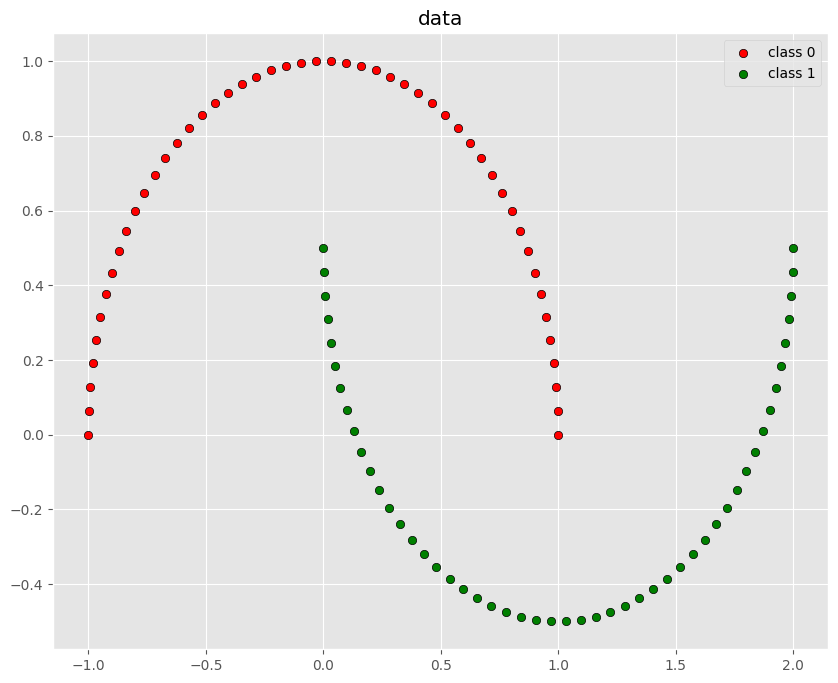

In [5]:
plt.scatter(data[:, 0][labels == 0], data[:, 1][labels == 0], c='r', edgecolors='black', label="class 0")
plt.scatter(data[:, 0][labels == 1], data[:, 1][labels == 1], c='g', edgecolors='black', label="class 1")
plt.title("data")
plt.legend()
plt.show()

Побудова моделі кластеризації: 

In [6]:
model = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="single") 
model.fit(data)

AgglomerativeClustering(linkage='single', metric='euclidean')

In [7]:
model.labels_

array([1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

In [8]:
np.unique(model.labels_)

array([0, 1])

Представлення розбиття на кластери:

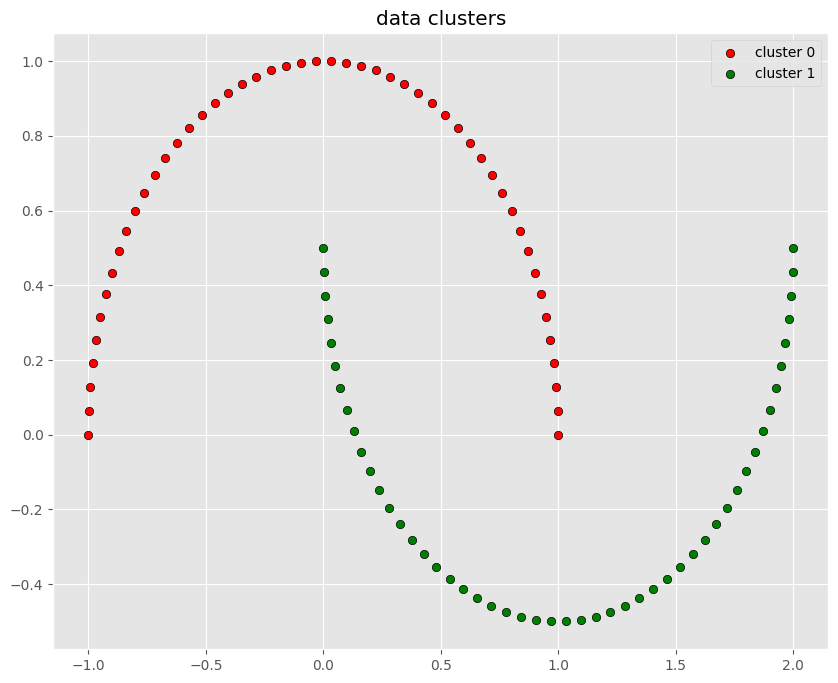

In [9]:
plt.scatter(data[:, 0][model.labels_ == 0], data[:, 1][model.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
plt.scatter(data[:, 0][model.labels_ == 1], data[:, 1][model.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
plt.title("data clusters")
plt.legend()
plt.show()

Розрахунок часу кластеризації при збільшенні розміру вхідних даних:

In [10]:
start_time = time.time()
AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="single").fit(datasets.make_moons(n_samples=100000)[0])
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Execution time: 71.7086660861969 seconds


Побудова альтернативних моделей та розрахунок критеріїв якості:

In [11]:
model_ward = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="ward") 
model_ward.fit(data)
model_single = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="single") 
model_single.fit(data)
model_average = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="average") 
model_average.fit(data)
model_complete = AgglomerativeClustering(n_clusters=2, metric="euclidean", linkage="complete") 
model_complete.fit(data)

AgglomerativeClustering(linkage='complete', metric='euclidean')

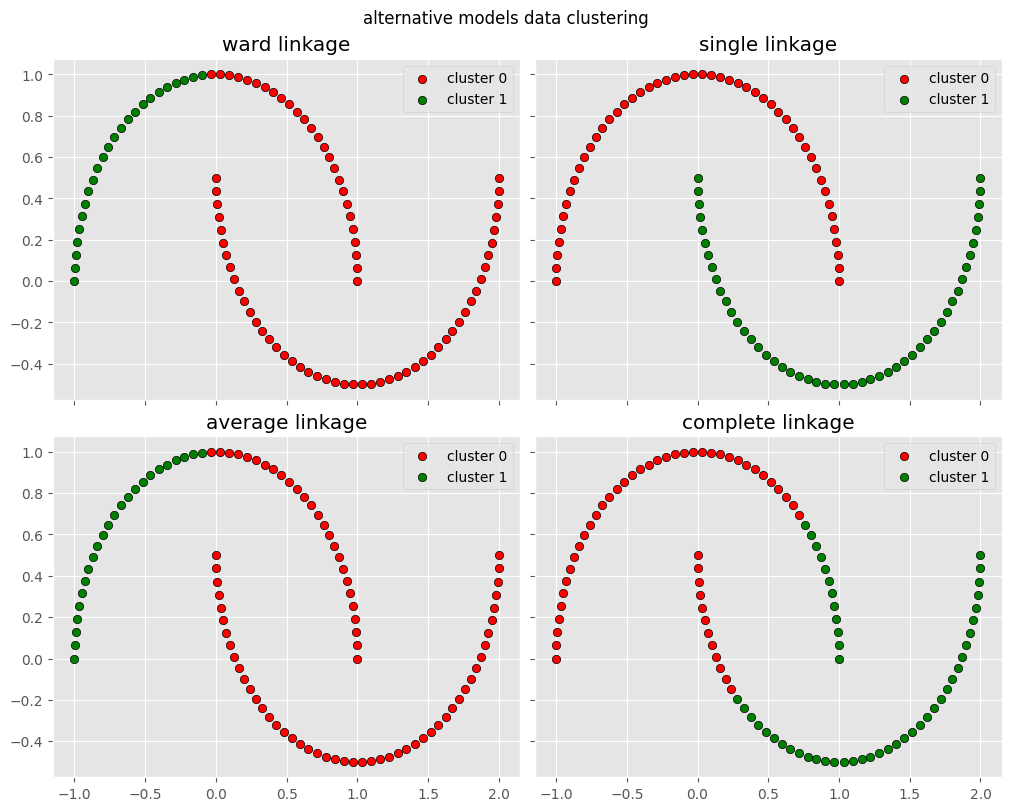

In [12]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
ax[0, 0].scatter(data[:, 0][model_ward.labels_ == 0], data[:, 1][model_ward.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[0, 0].scatter(data[:, 0][model_ward.labels_ == 1], data[:, 1][model_ward.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[0, 0].set_title("ward linkage")
ax[0, 0].legend()
ax[0, 1].scatter(data[:, 0][model_single.labels_ == 0], data[:, 1][model_single.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[0, 1].scatter(data[:, 0][model_single.labels_ == 1], data[:, 1][model_single.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[0, 1].set_title("single linkage")
ax[0, 1].legend()
ax[1, 0].scatter(data[:, 0][model_average.labels_ == 0], data[:, 1][model_average.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[1, 0].scatter(data[:, 0][model_average.labels_ == 1], data[:, 1][model_average.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[1, 0].set_title("average linkage")
ax[1, 0].legend()
ax[1, 1].scatter(data[:, 0][model_complete.labels_ == 0], data[:, 1][model_complete.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[1, 1].scatter(data[:, 0][model_complete.labels_ == 1], data[:, 1][model_complete.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[1, 1].set_title("complete linkage")
ax[1, 1].legend()
fig.suptitle("alternative models data clustering")
plt.show()

In [13]:
index = ["ward", "single", "average", "complete"]
estimated_number_of_clasters = [model_ward.n_clusters_, model_single.n_clusters_, model_average.n_clusters_, model_complete.n_clusters_]
adjusted_rand_index = [metrics.adjusted_rand_score(labels, model_ward.labels_), metrics.adjusted_rand_score(labels, model_single.labels_), metrics.adjusted_rand_score(labels, model_average.labels_), metrics.adjusted_rand_score(labels, model_complete.labels_)]
v_measure = [metrics.v_measure_score(labels, model_ward.labels_), metrics.v_measure_score(labels, model_single.labels_), metrics.v_measure_score(labels, model_average.labels_), metrics.v_measure_score(labels, model_complete.labels_)]
comparison_df = pd.DataFrame({'estimated_number_of_clasters': estimated_number_of_clasters, 'adjusted_rand_index': adjusted_rand_index, 'v_measure': v_measure}, index=index)
comparison_df

,estimated_number_of_clasters,adjusted_rand_index,v_measure
ward,2,0.224686,0.329371
single,2,1.000000,1.000000
average,2,0.224686,0.329371
complete,2,0.262955,0.204960


In [14]:
metrics.pairwise_distances(data[model_ward.labels_ == 0], data[model_ward.labels_ == 1], metric="euclidean")

array([[1.34182094, 1.26248567, 1.33975469, ..., 1.3211151 , 1.33222105,
        1.34172882],
       [1.14423332, 0.31919979, 1.19622106, ..., 1.3913651 , 0.80956669,
        0.9814351 ],
       [1.67617621, 1.03678514, 1.71028553, ..., 1.82882525, 1.4366987 ,
        1.56366296],
       ...,
       [2.73682601, 2.24130172, 2.75424927, ..., 2.79796607, 2.57962295,
        2.66932033],
       [2.61168557, 2.18856198, 2.623955  , ..., 2.64764041, 2.48602016,
        2.55986913],
       [1.29645679, 0.50730917, 1.34460178, ..., 1.52289192, 0.9814351 ,
        1.14423332]])

In [15]:
metrics.pairwise_distances(data[model_single.labels_ == 0], data[model_single.labels_ == 1], metric="euclidean")

array([[1.18914441, 1.78150159, 1.96343248, ..., 1.91921675, 1.9680985 ,
        1.93736118],
       [0.94882085, 1.14287218, 1.21601146, ..., 1.20747293, 1.21849242,
        1.20420397],
       [1.34182094, 2.25408905, 2.70918838, ..., 2.86978713, 2.73682601,
        2.61168557],
       ...,
       [1.17210289, 1.73662942, 1.90519561, ..., 1.85543822, 1.90900854,
        1.88206215],
       [1.34172882, 2.23149579, 2.64562413, ..., 2.76754608, 2.66932033,
        2.55986913],
       [1.13593924, 1.64178466, 1.78499162, ..., 1.72730045, 1.78733695,
        1.76712612]])

In [16]:
metrics.pairwise_distances(data[model_average.labels_ == 0], data[model_average.labels_ == 1], metric="euclidean")

array([[1.34182094, 1.26248567, 1.33975469, ..., 1.3211151 , 1.33222105,
        1.34172882],
       [1.14423332, 0.31919979, 1.19622106, ..., 1.3913651 , 0.80956669,
        0.9814351 ],
       [1.67617621, 1.03678514, 1.71028553, ..., 1.82882525, 1.4366987 ,
        1.56366296],
       ...,
       [2.73682601, 2.24130172, 2.75424927, ..., 2.79796607, 2.57962295,
        2.66932033],
       [2.61168557, 2.18856198, 2.623955  , ..., 2.64764041, 2.48602016,
        2.55986913],
       [1.29645679, 0.50730917, 1.34460178, ..., 1.52289192, 0.9814351 ,
        1.14423332]])

In [17]:
metrics.pairwise_distances(data[model_complete.labels_ == 0], data[model_complete.labels_ == 1], metric="euclidean")

array([[1.18914441, 0.75053401, 1.78150159, ..., 1.91921675, 1.9680985 ,
        1.93736118],
       [1.34182094, 1.67617621, 2.25408905, ..., 2.86978713, 2.73682601,
        2.61168557],
       [1.26248567, 1.03678514, 1.97839228, ..., 2.22685438, 2.24130172,
        2.18856198],
       ...,
       [1.17210289, 0.69073011, 1.73662942, ..., 1.85543822, 1.90900854,
        1.88206215],
       [1.34172882, 1.56366296, 2.23149579, ..., 2.76754608, 2.66932033,
        2.55986913],
       [1.13593924, 0.56905517, 1.64178466, ..., 1.72730045, 1.78733695,
        1.76712612]])

Отже, можемо зробити висновок що найкраща модель має параметр linkage рівний single.

Перевіримо на стійкість після вилучення окремих об`єктів:

In [18]:
data_modified = data[20:]

In [19]:
model.fit(data_modified)

AgglomerativeClustering(linkage='single', metric='euclidean')

In [20]:
model.labels_

array([1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1])

In [21]:
labels[20:]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0])

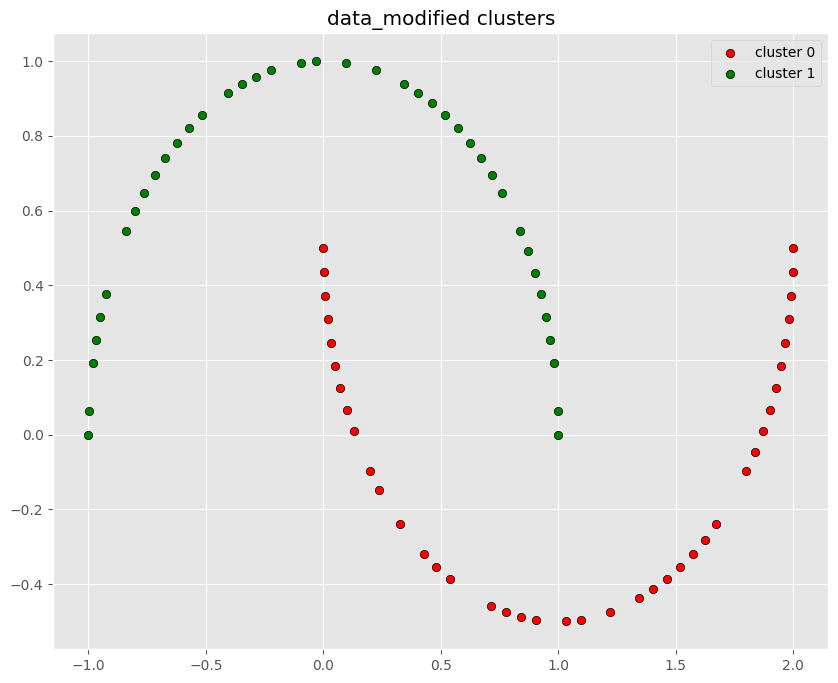

In [22]:
plt.scatter(data_modified[:, 0][model.labels_ == 0], data_modified[:, 1][model.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
plt.scatter(data_modified[:, 0][model.labels_ == 1], data_modified[:, 1][model.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
plt.title("data_modified clusters")
plt.legend()
plt.show()

Отже, розбиття є стабільним після вилучення окремих об`єктів.

### Набір даних (б)

In [23]:
iris = datasets.load_iris()
data = iris['data']
labels = iris['target']

In [24]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Візуалізація даних:

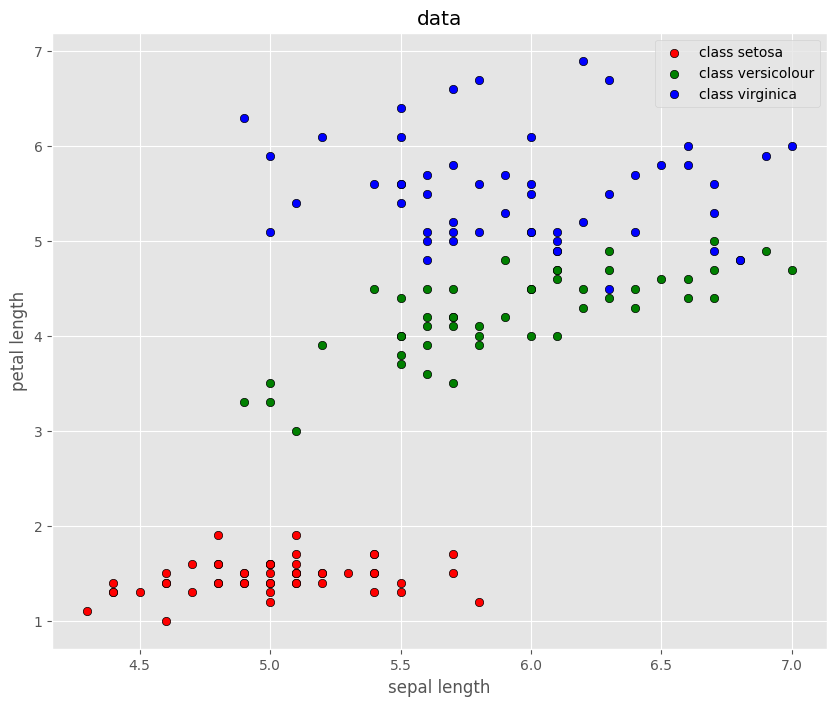

In [25]:
plt.scatter(data[:, 0][labels == 0], data[:, 2][labels == 0], c='r', edgecolors='black', label="class setosa")
plt.scatter(data[:, 0][labels == 1], data[:, 2][labels == 1], c='g', edgecolors='black', label="class versicolour")
plt.scatter(data[:, 0][labels == 1], data[:, 2][labels == 2], c='b', edgecolors='black', label="class virginica")
plt.title("data")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()
plt.show()

Побудова моделі кластеризації: 

In [26]:
model = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward") 
model.fit(data)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [27]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [28]:
np.unique(model.labels_)

array([0, 1, 2])

Представлення розбиття на кластери:

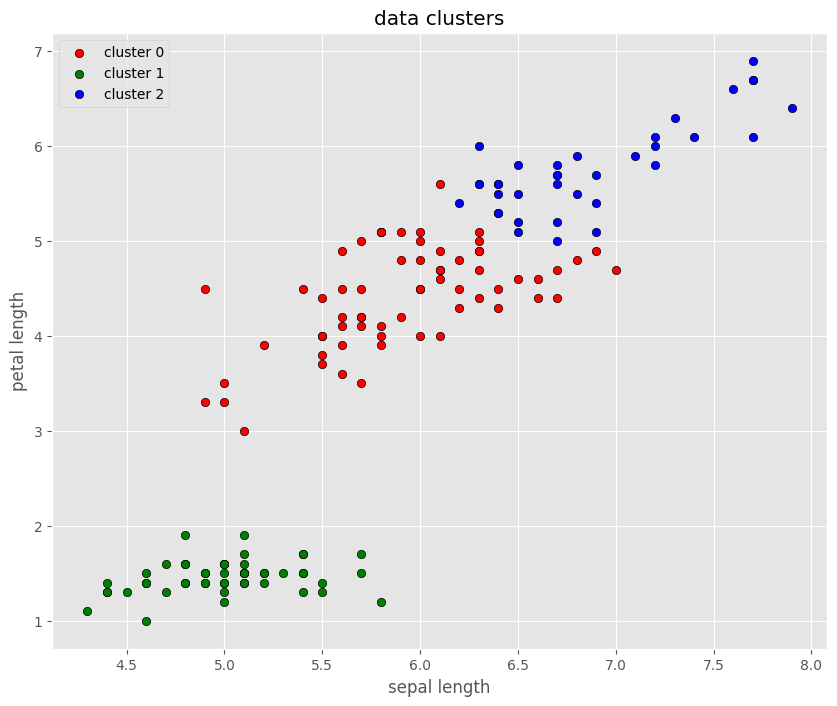

In [29]:
plt.scatter(data[:, 0][model.labels_ == 0], data[:, 2][model.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
plt.scatter(data[:, 0][model.labels_ == 1], data[:, 2][model.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
plt.scatter(data[:, 0][model.labels_ == 2], data[:, 2][model.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
plt.title("data clusters")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()
plt.show()

Розрахунок часу кластеризації:

In [30]:
start_time = time.time()
AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward").fit(datasets.load_iris()['data'])
end_time = time.time()
print(f"Execution time: {end_time - start_time} seconds")

Execution time: 0.003747701644897461 seconds


Побудова альтернативних моделей та розрахунок критеріїв якості:

In [31]:
model_ward = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward") 
model_ward.fit(data)
model_single = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="single") 
model_single.fit(data)
model_average = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="average") 
model_average.fit(data)
model_complete = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="complete") 
model_complete.fit(data)

AgglomerativeClustering(linkage='complete', metric='euclidean', n_clusters=3)

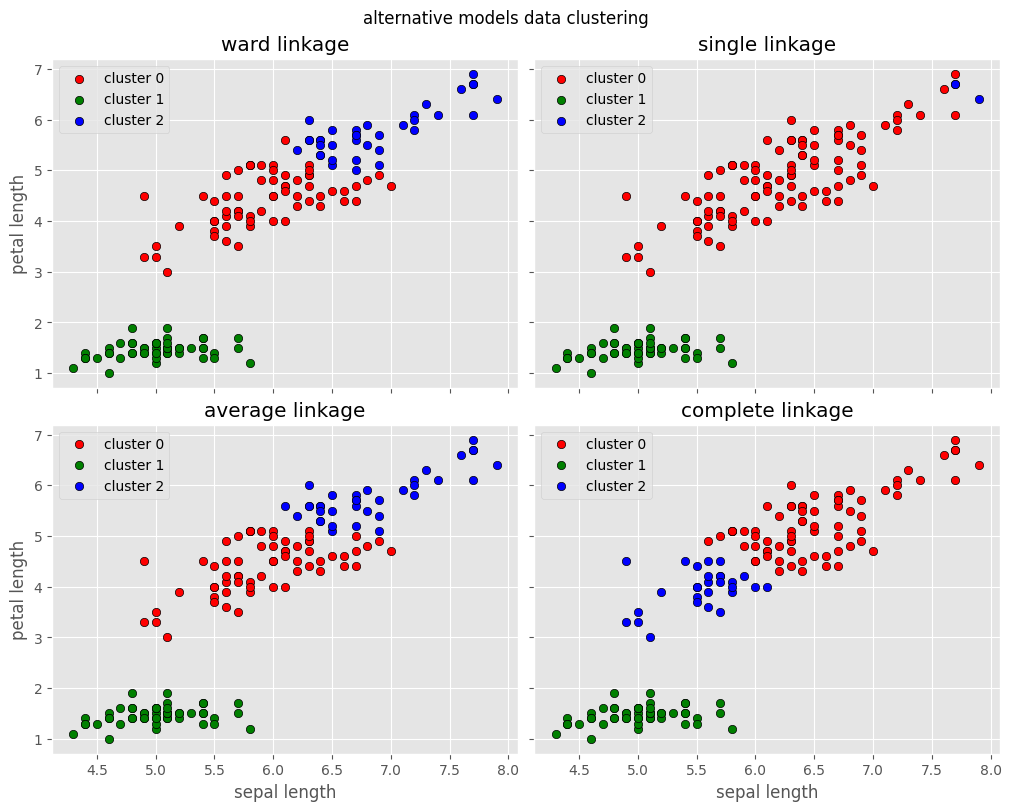

In [32]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, layout="constrained")
ax[0, 0].scatter(data[:, 0][model_ward.labels_ == 0], data[:, 2][model_ward.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[0, 0].scatter(data[:, 0][model_ward.labels_ == 1], data[:, 2][model_ward.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[0, 0].scatter(data[:, 0][model_ward.labels_ == 2], data[:, 2][model_ward.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
ax[0, 0].set_title("ward linkage")
ax[0, 0].set_ylabel("petal length")
ax[0, 0].legend()
ax[0, 1].scatter(data[:, 0][model_single.labels_ == 0], data[:, 2][model_single.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[0, 1].scatter(data[:, 0][model_single.labels_ == 1], data[:, 2][model_single.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[0, 1].scatter(data[:, 0][model_single.labels_ == 2], data[:, 2][model_single.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
ax[0, 1].set_title("single linkage")
ax[0, 1].legend()
ax[1, 0].scatter(data[:, 0][model_average.labels_ == 0], data[:, 2][model_average.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[1, 0].scatter(data[:, 0][model_average.labels_ == 1], data[:, 2][model_average.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[1, 0].scatter(data[:, 0][model_average.labels_ == 2], data[:, 2][model_average.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
ax[1, 0].set_title("average linkage")
ax[1, 0].set_xlabel("sepal length")
ax[1, 0].set_ylabel("petal length")
ax[1, 0].legend()
ax[1, 1].scatter(data[:, 0][model_complete.labels_ == 0], data[:, 2][model_complete.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
ax[1, 1].scatter(data[:, 0][model_complete.labels_ == 1], data[:, 2][model_complete.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
ax[1, 1].scatter(data[:, 0][model_complete.labels_ == 2], data[:, 2][model_complete.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
ax[1, 1].set_title("complete linkage")
ax[1, 1].set_xlabel("sepal length")
ax[1, 1].legend()
fig.suptitle("alternative models data clustering")
plt.show()

In [33]:
index = ["ward", "single", "average", "complete"]
estimated_number_of_clasters = [model_ward.n_clusters_, model_single.n_clusters_, model_average.n_clusters_, model_complete.n_clusters_]
adjusted_rand_index = [metrics.adjusted_rand_score(labels, model_ward.labels_), metrics.adjusted_rand_score(labels, model_single.labels_), metrics.adjusted_rand_score(labels, model_average.labels_), metrics.adjusted_rand_score(labels, model_complete.labels_)]
v_measure = [metrics.v_measure_score(labels, model_ward.labels_), metrics.v_measure_score(labels, model_single.labels_), metrics.v_measure_score(labels, model_average.labels_), metrics.v_measure_score(labels, model_complete.labels_)]
comparison_df = pd.DataFrame({'estimated_number_of_clasters': estimated_number_of_clasters, 'adjusted_rand_index': adjusted_rand_index, 'v_measure': v_measure}, index=index)
comparison_df

,estimated_number_of_clasters,adjusted_rand_index,v_measure
ward,3,0.731199,0.770084
single,3,0.563751,0.717464
average,3,0.759199,0.805694
complete,3,0.642251,0.722066


In [34]:
metrics.pairwise_distances(data, metric="euclidean")

array([[0.        , 0.53851648, 0.50990195, ..., 4.45982062, 4.65080638,
        4.14004831],
       [0.53851648, 0.        , 0.3       , ..., 4.49888875, 4.71805044,
        4.15331193],
       [0.50990195, 0.3       , 0.        , ..., 4.66154481, 4.84871117,
        4.29883705],
       ...,
       [4.45982062, 4.49888875, 4.66154481, ..., 0.        , 0.6164414 ,
        0.64031242],
       [4.65080638, 4.71805044, 4.84871117, ..., 0.6164414 , 0.        ,
        0.76811457],
       [4.14004831, 4.15331193, 4.29883705, ..., 0.64031242, 0.76811457,
        0.        ]])

Отже, можемо зробити висновок що найкраща модель має параметр linkage рівний average.

Перевіримо на стійкість після вилучення окремих об`єктів:

In [35]:
data_modified = data[20:]

In [36]:
model.fit(data_modified)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [37]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [38]:
labels[20:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

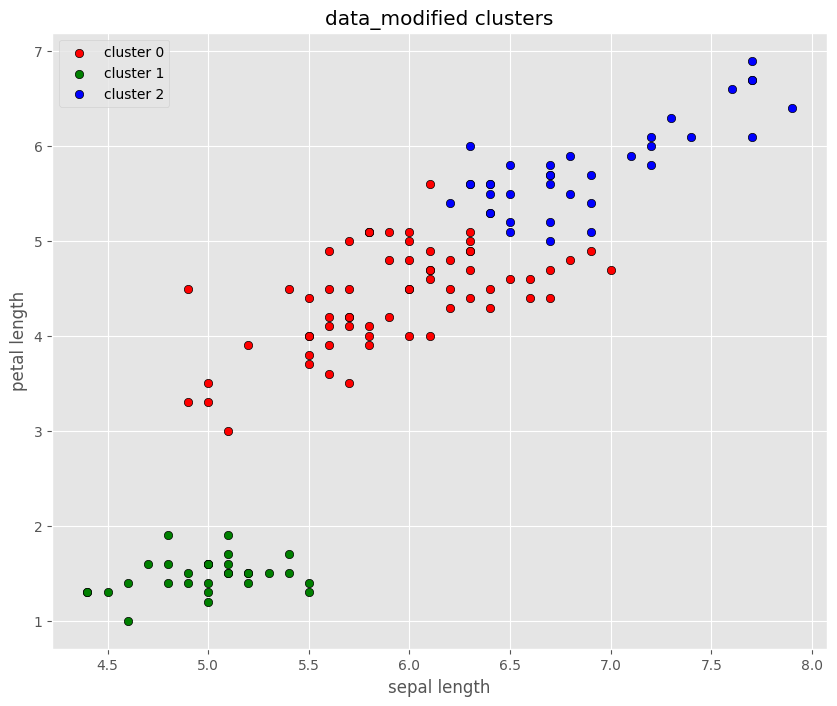

In [39]:
plt.scatter(data_modified[:, 0][model.labels_ == 0], data_modified[:, 2][model.labels_ == 0], c='r', edgecolors='black', label="cluster 0")
plt.scatter(data_modified[:, 0][model.labels_ == 1], data_modified[:, 2][model.labels_ == 1], c='g', edgecolors='black', label="cluster 1")
plt.scatter(data_modified[:, 0][model.labels_ == 2], data_modified[:, 2][model.labels_ == 2], c='b', edgecolors='black', label="cluster 2")
plt.title("data_modified clusters")
plt.xlabel("sepal length")
plt.ylabel("petal length")
plt.legend()
plt.show()

Отже, розбиття є стабільним після вилучення окремих об`єктів.